In [1]:
import os
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync')


plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

In [2]:
input_dir = 'RawData/SUSB'

msa_file = 'msa_3digitnaics_2016.csv'

susb_msa_3naics = read_csv(os.path.join(input_dir, msa_file))
print(len(susb_msa_3naics))
susb_msa_3naics.head(5)

588675


,MSA,NAICS,ENTRSIZE,FIRM,ESTB,EMPL,EMPLFL_R,EMPLFL_N,PAYR,PAYRFL_N,MSADSCR,NAICSDSCR,ENTRSIZEDSCR
0,10100,--,1,1342,1418,19533,NaN,G,746190,H,"Aberdeen, SD Micro Area",Total,01: Total
1,10100,--,2,663,663,1076,NaN,H,41114,G,"Aberdeen, SD Micro Area",Total,02: 0-4
2,10100,--,3,216,216,1442,NaN,G,45082,G,"Aberdeen, SD Micro Area",Total,03: 5-9
3,10100,--,4,139,143,1759,NaN,G,58959,G,"Aberdeen, SD Micro Area",Total,04: 10-19
4,10100,--,5,1018,1022,4277,NaN,G,145155,G,"Aberdeen, SD Micro Area",Total,05: <20


In [3]:
print(susb_msa_3naics[['FIRM', 'ESTB', 'EMPL']].sum())

FIRM     69355639
ESTB     77122877
EMPL    919369158
dtype: int64


In [13]:
susb_msa_3naics.loc[:, 'digit_count'] = \
susb_msa_3naics['NAICS'].str.len()

# get control total
susb_msa_3naics_total = \
susb_msa_3naics.loc[susb_msa_3naics['NAICS'] == '--']
susb_msa_3naics_total = \
susb_msa_3naics_total.loc[susb_msa_3naics_total['ENTRSIZEDSCR'] == '01:  Total']
print(susb_msa_3naics_total[['FIRM', 'ESTB', 'EMPL']].sum())

susb_msa_3naics_by_eg = \
susb_msa_3naics.loc[(susb_msa_3naics['NAICS'] == '--') & (susb_msa_3naics['ENTRSIZEDSCR'] != '01:  Total')]
print(susb_msa_3naics_by_eg[['FIRM', 'ESTB', 'EMPL']].sum())

FIRM      6097593
ESTB      7311519
EMPL    117018359
dtype: int64
FIRM     16887692
ESTB     18417947
EMPL    193746762
dtype: int64


In [21]:
# get detailed firm/est record
susb_msa_3naics_detail = \
susb_msa_3naics.loc[susb_msa_3naics['digit_count'] == 3]
susb_msa_3naics_margin = \
susb_msa_3naics_detail.loc[susb_msa_3naics_detail['ENTRSIZEDSCR'] == '01:  Total']

print(susb_msa_3naics_margin[['FIRM', 'ESTB', 'EMPL']].sum())

emp_groups = ['02:  0-4', '03:  5-9', '04:  10-19',
        '06:  20-99', '07:  100-499', '09:  500+']

susb_msa_3naics_by_eg = \
susb_msa_3naics_detail.loc[susb_msa_3naics_detail['ENTRSIZEDSCR'].isin(emp_groups)]
print(susb_msa_3naics_by_eg[['FIRM', 'ESTB', 'EMPL']].sum())

# check sample data
# sel_idx = ((susb_msa_3naics_detail['MSA'] == 10100) & \
# (susb_msa_3naics_detail['NAICS'] == '115'))
# susb_msa_3naics_detail_sample = \
# susb_msa_3naics_detail.loc[sel_idx]
# susb_msa_3naics_detail_sample

susb_msa_3naics_by_eg.head(10)

FIRM      6189864
ESTB      7295131
EMPL    114535582
dtype: int64
FIRM      6189864
ESTB      7295131
EMPL    109355865
dtype: int64


,MSA,NAICS,ENTRSIZE,FIRM,ESTB,EMPL,EMPLFL_R,EMPLFL_N,PAYR,PAYRFL_N,MSADSCR,NAICSDSCR,ENTRSIZEDSCR,digit_count
15,10100,115,2,6,6,5,NaN,G,562,J,"Aberdeen, SD Micro Area",Support Activities for Agriculture and Forestry,02: 0-4,3
16,10100,115,3,2,2,0,A,D,0,D,"Aberdeen, SD Micro Area",Support Activities for Agriculture and Forestry,03: 5-9,3
25,10100,212,2,2,2,0,A,D,0,D,"Aberdeen, SD Micro Area",Mining (except Oil and Gas),02: 0-4,3
26,10100,212,4,1,1,0,B,D,0,D,"Aberdeen, SD Micro Area",Mining (except Oil and Gas),04: 10-19,3
37,10100,221,4,1,1,0,A,D,0,D,"Aberdeen, SD Micro Area",Utilities,04: 10-19,3
39,10100,221,6,2,2,0,B,D,0,D,"Aberdeen, SD Micro Area",Utilities,06: 20-99,3
40,10100,221,7,1,1,0,A,D,0,D,"Aberdeen, SD Micro Area",Utilities,07: 100-499,3
42,10100,221,9,3,5,43,NaN,J,3230,J,"Aberdeen, SD Micro Area",Utilities,09: 500+,3
53,10100,236,2,47,47,73,NaN,J,2780,H,"Aberdeen, SD Micro Area",Construction of Buildings,02: 0-4,3
54,10100,236,3,7,7,49,NaN,H,1581,G,"Aberdeen, SD Micro Area",Construction of Buildings,03: 5-9,3


251712
93.0


Text(0, 0.5, 'Probability Density')

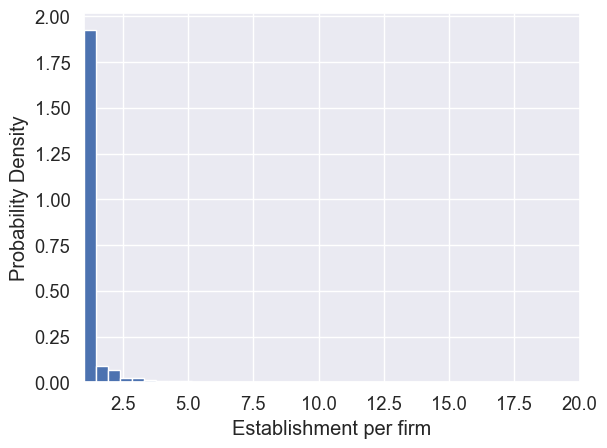

In [28]:
# establishment per firm distribution
print(len(susb_msa_3naics_by_eg))
susb_msa_3naics_by_eg.loc[:, 'est_per_firm'] = \
susb_msa_3naics_by_eg.loc[:, 'ESTB'] / \
susb_msa_3naics_by_eg.loc[:, 'FIRM']
susb_msa_3naics_by_eg.loc[:, 'est_per_firm'].hist(bins = 200, density = True)
print(susb_msa_3naics_by_eg.loc[:, 'est_per_firm'].max())
plt.xlim([1, 20])
plt.xlabel('Establishment per firm')
plt.ylabel('Probability Density')